<a href="https://colab.research.google.com/github/elisaperisset/bicingchallenge/blob/main/00_BicingChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import os
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
bikes = pd.read_csv('gdrive/My Drive/Colab Notebooks/BicingChallenge/Datasets/2019_01_Gener_BICING_US.csv')
bikes.head()
# Later I realized I could have parsed the data during the import, using the parse_dates and infer_datetime_format:
# bUsage2001 = pd.read_csv('gdrive/My Drive/Colab Notebooks/BicingChallenge/Datasets/2019_01_Gener_BICING_US.csv', parse_dates=[4], infer_datetime_format=True)

,error,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage,dateTime
0,0,50,0,50,2019-01-01 00:00:11
1,0,47,0,47,2019-01-01 00:05:12
2,0,50,0,50,2019-01-01 00:10:12
3,0,76,0,76,2019-01-01 00:15:12
4,0,119,0,119,2019-01-01 00:20:12


In the following cells I will be using Pandas functions to have a better grasp on the data The following are:

df.head() --> Returns the first n rows for the dataframe df, if no value is set, n defaults to 5.
df.info() --> Returns a concise summary of the dataframe df including total record count, total column count, for each column, count of null and non-null, and Dtype.
df.shape --> Returns a tuple representing the dimensionality of the DataFrame df: (#rows, #columns).
df.describe() --> Returns for all numeric and object columns descriptive statistics including: count, mean, std, min, 25%, 50%, 75%, max.

In [25]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8055 entries, 0 to 8054
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   error                   8055 non-null   int64 
 1   bikesInUsage            8055 non-null   int64 
 2   electricalBikesInUsage  8055 non-null   int64 
 3   mechanicalBikesInUsage  8055 non-null   int64 
 4   dateTime                8055 non-null   object
dtypes: int64(4), object(1)
memory usage: 314.8+ KB


In [26]:
bikes.shape

(8055, 5)

In [27]:
bikes.describe()

,error,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage
count,8055.0,8055.000000,8055.000000,8055.000000
mean,0.0,235.891372,2.716449,233.174922
std,0.0,177.520787,3.110105,175.077264
min,0.0,7.000000,0.000000,6.000000
25%,0.0,79.500000,1.000000,79.000000
50%,0.0,211.000000,2.000000,209.000000
75%,0.0,352.000000,4.000000,348.000000
max,0.0,940.000000,23.000000,924.000000


In [28]:
#Find row with max bikes in use
maxBikesInUsage=bikes['bikesInUsage'].idxmax()
pd.DataFrame(bikes.loc[maxBikesInUsage])

,3265
error,0
bikesInUsage,940
electricalBikesInUsage,19
mechanicalBikesInUsage,921
dateTime,2019-01-15 08:50:16


In [29]:
#Find row with min bikes in use
minBikesInUsage=bikes['bikesInUsage'].idxmin()
pd.DataFrame(bikes.loc[minBikesInUsage])

,7222
error,0
bikesInUsage,7
electricalBikesInUsage,1
mechanicalBikesInUsage,6
dateTime,2019-01-29 02:34:58


In [30]:
#Create a new column to change the dateTime from object Dtype to datetime64[ns]
bikes['structuredDateTime'] = pd.to_datetime(bikes['dateTime'])
bikes.head()

,error,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage,dateTime,structuredDateTime
0,0,50,0,50,2019-01-01 00:00:11,2019-01-01 00:00:11
1,0,47,0,47,2019-01-01 00:05:12,2019-01-01 00:05:12
2,0,50,0,50,2019-01-01 00:10:12,2019-01-01 00:10:12
3,0,76,0,76,2019-01-01 00:15:12,2019-01-01 00:15:12
4,0,119,0,119,2019-01-01 00:20:12,2019-01-01 00:20:12


In [31]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8055 entries, 0 to 8054
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   error                   8055 non-null   int64         
 1   bikesInUsage            8055 non-null   int64         
 2   electricalBikesInUsage  8055 non-null   int64         
 3   mechanicalBikesInUsage  8055 non-null   int64         
 4   dateTime                8055 non-null   object        
 5   structuredDateTime      8055 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 377.7+ KB


In [32]:
#Create columns for date, time, day of week, etc
bikes['date'] = bikes['structuredDateTime'].dt.date
bikes['weekday'] = bikes['structuredDateTime'].dt.day_name()
bikes['year'] = bikes['structuredDateTime'].dt.year
bikes['month'] = bikes['structuredDateTime'].dt.month
bikes['day'] = bikes['structuredDateTime'].dt.day
bikes['time'] = bikes['structuredDateTime'].dt.time
bikes['hour'] = bikes['structuredDateTime'].dt.hour
bikes['minute'] = bikes['structuredDateTime'].dt.minute
bikes['second'] = bikes['structuredDateTime'].dt.second
bikes.head()

,error,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage,dateTime,structuredDateTime,date,weekday,year,month,day,time,hour,minute,second
0,0,50,0,50,2019-01-01 00:00:11,2019-01-01 00:00:11,2019-01-01,Tuesday,2019,1,1,00:00:11,0,0,11
1,0,47,0,47,2019-01-01 00:05:12,2019-01-01 00:05:12,2019-01-01,Tuesday,2019,1,1,00:05:12,0,5,12
2,0,50,0,50,2019-01-01 00:10:12,2019-01-01 00:10:12,2019-01-01,Tuesday,2019,1,1,00:10:12,0,10,12
3,0,76,0,76,2019-01-01 00:15:12,2019-01-01 00:15:12,2019-01-01,Tuesday,2019,1,1,00:15:12,0,15,12
4,0,119,0,119,2019-01-01 00:20:12,2019-01-01 00:20:12,2019-01-01,Tuesday,2019,1,1,00:20:12,0,20,12


In [33]:
bikes.sort_values(by=['structuredDateTime']).reset_index()
bikes['timeSinceLastCount'] = bikes['structuredDateTime'].diff()
bikes

,error,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage,dateTime,structuredDateTime,date,weekday,year,month,day,time,hour,minute,second,timeSinceLastCount
0,0,50,0,50,2019-01-01 00:00:11,2019-01-01 00:00:11,2019-01-01,Tuesday,2019,1,1,00:00:11,0,0,11,NaT
1,0,47,0,47,2019-01-01 00:05:12,2019-01-01 00:05:12,2019-01-01,Tuesday,2019,1,1,00:05:12,0,5,12,0 days 00:05:01
2,0,50,0,50,2019-01-01 00:10:12,2019-01-01 00:10:12,2019-01-01,Tuesday,2019,1,1,00:10:12,0,10,12,0 days 00:05:00
3,0,76,0,76,2019-01-01 00:15:12,2019-01-01 00:15:12,2019-01-01,Tuesday,2019,1,1,00:15:12,0,15,12,0 days 00:05:00
4,0,119,0,119,2019-01-01 00:20:12,2019-01-01 00:20:12,2019-01-01,Tuesday,2019,1,1,00:20:12,0,20,12,0 days 00:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8050,0,156,2,154,2019-01-31 23:35:00,2019-01-31 23:35:00,2019-01-31,Thursday,2019,1,31,23:35:00,23,35,0,0 days 00:05:01
8051,0,147,2,145,2019-01-31 23:40:00,2019-01-31 23:40:00,2019-01-31,Thursday,2019,1,31,23:40:00,23,40,0,0 days 00:05:00
8052,0,138,2,136,2019-01-31 23:45:00,2019-01-31 23:45:00,2019-01-31,Thursday,2019,1,31,23:45:00,23,45,0,0 days 00:05:00
8053,0,130,1,129,2019-01-31 23:49:59,2019-01-31 23:49:59,2019-01-31,Thursday,2019,1,31,23:49:59,23,49,59,0 days 00:04:59


In [34]:
# Find gaps in the data by getting the longest timestamps' difference
bikes.sort_values(by=['timeSinceLastCount'], ascending=False).head()

,error,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage,dateTime,structuredDateTime,date,weekday,year,month,day,time,hour,minute,second,timeSinceLastCount
2157,0,488,4,484,2019-01-10 15:55:15,2019-01-10 15:55:15,2019-01-10,Thursday,2019,1,10,15:55:15,15,55,15,2 days 04:15:00
2159,0,293,0,293,2019-01-11 12:30:15,2019-01-11 12:30:15,2019-01-11,Friday,2019,1,11,12:30:15,12,30,15,0 days 20:30:00
2615,0,81,0,81,2019-01-13 02:40:17,2019-01-13 02:40:17,2019-01-13,Sunday,2019,1,13,02:40:17,2,40,17,0 days 00:10:02
2160,0,319,1,318,2019-01-11 12:40:15,2019-01-11 12:40:15,2019-01-11,Friday,2019,1,11,12:40:15,12,40,15,0 days 00:10:00
1782,0,8,0,8,2019-01-07 04:34:16,2019-01-07 04:34:16,2019-01-07,Monday,2019,1,7,04:34:16,4,34,16,0 days 00:09:04


### Findings
We found out that there is no data in 2 large periods: 
*   2 days and 4 hours --> from January 8th at 11:40:15 to Jan 10th at 15:55:15
*   20 hours --> from January 10th at 16:00:15 to Jan 11th at 12:30:*15*

In [35]:
bikes[bikes['day']==10]

,error,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage,dateTime,structuredDateTime,date,weekday,year,month,day,time,hour,minute,second,timeSinceLastCount
2157,0,488,4,484,2019-01-10 15:55:15,2019-01-10 15:55:15,2019-01-10,Thursday,2019,1,10,15:55:15,15,55,15,2 days 04:15:00
2158,0,448,3,445,2019-01-10 16:00:15,2019-01-10 16:00:15,2019-01-10,Thursday,2019,1,10,16:00:15,16,0,15,0 days 00:05:00


# Visualisations

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Prints: [6.0, 4.0]
print("Current size:", fig_size)

# Set figure width to 20 and height to 9
fig_size[0] = 20
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print("Current size:", fig_size)

Current size: [20.0, 9.0]
Current size: [20, 9]


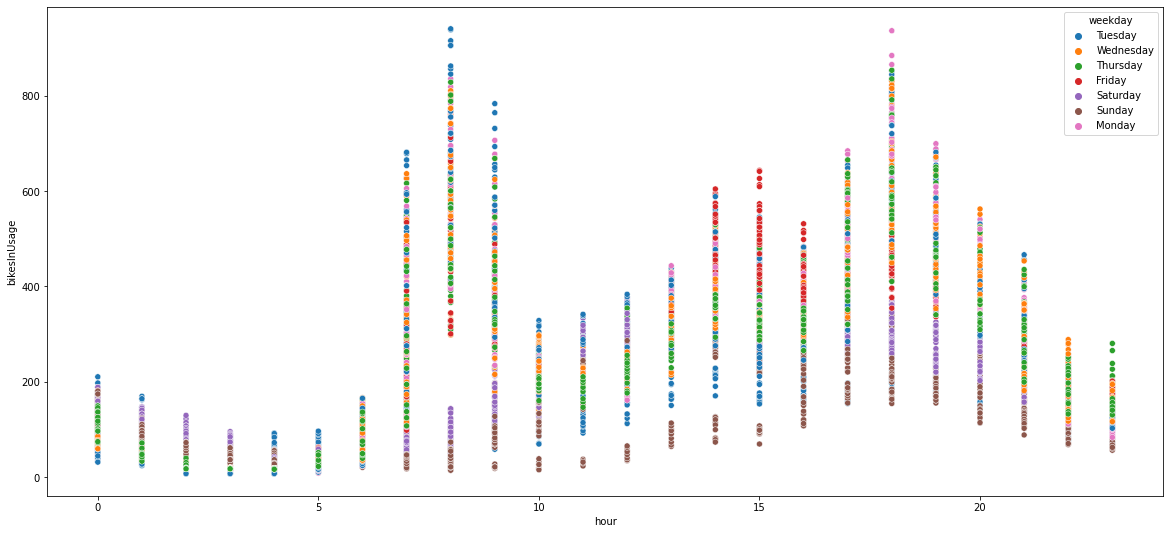

In [37]:
sns.scatterplot(x=bikes.hour, y=bikes.bikesInUsage, hue=bikes.weekday)
plt.show()